# 20.0 - ***Deep Learning***  - Air Passenger Data + Stock Market prediction with LSTM 

Youtube video [Stock Price Prediction Using Python & Machine Learning](https://www.youtube.com/watch?v=QIUxPv5PJOY&t=947s&ab_channel=ComputerScience)

Github [Stock-Price-Prediction-Using-Recurrent-Neural-Network-LSTM](https://github.com/ca-montenegro/Stock-Price-Prediction-Using-Recurrent-Neural-Network-LSTM/blob/master/Stock_price_prediction_LSTM.ipynb)

### Understanding recurrent neural networks

**The idea
behind RNNs is simple:** They examine each element of the sequence once and
retain memory of it so that they can reuse it when examining the next element in
the sequence.
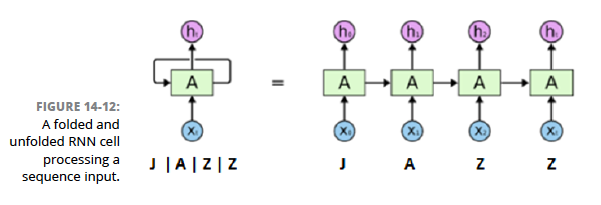

### Definition of LSTM
Jürgen Schmidhuber, a pioneer in the field of artificial intelligence, published
**“Long Short-Term Memory”*** in the MIT Press journal Neural Computation.

The new cell concept proposed by the
article, named LSTM (short for long short-term memory) is used today to perform
more than 4 billion neural operations per day. LTSM is considered
the standard for machine translation and chatbots.

Google, Apple, Facebook, Microsoft, and Amazon have all developed products
around the LSTM technology devised by Hochreiter and Schmidhuber. Products
such as smart voice assistants and machine translators would work differently if
LSTM were not invented.

In [40]:
import pandas as pd
import numpy as np
import math

import pandas_datareader as pdr
from pandas_datareader import data as web
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

plt.style.use('fivethirtyeight')

import pandas as pd
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None

# Task 1 - Air Passenger Data

A well-known problem in times series, the Air Passenger Data is an example first found in the classic book “Time Series Analysis, Forecasting and Control” by Box, Jenkins and Reinsel, published in 1976 by Wiley and it has now become a public classic to be found in all books and software about time series. 

The figures in the Air Passenger Data are the monthly totals of international airline passengers, 1949 to 1960, of an American airline company. The interesting aspect of such figures is that they feature a growing trend that is not linear and they display some seasonal recurrence (for instance more travelling during summer).



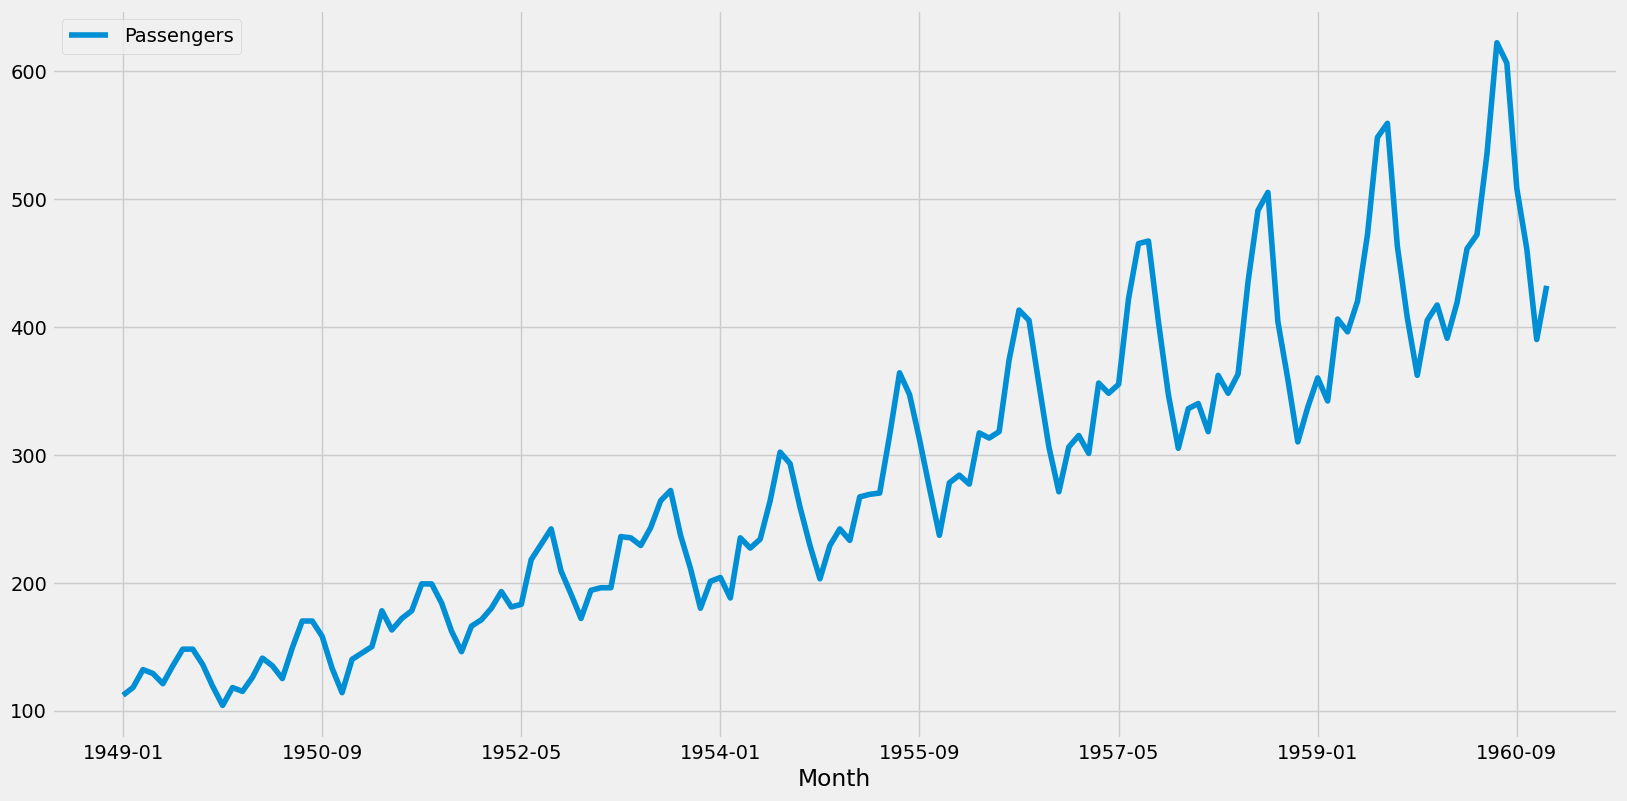

In [57]:
# filename = 'https://github.com/lmassaron/datasets/blob/master/'
# filename += 'releases/download/1.0/'
# filename += 'air_passengers.feather'

filename = 'https://github.com/lmassaron/datasets/raw/master/air_passengers.feather'

passengers = pd.read_feather(filename)
passengers = passengers.set_index('Month')

passengers.plot(figsize=(18, 9))

plt.show();

# Task 2 - Stock Price Prediction

## Task Description

#### This program uses artificial recurrent neural network called Long Short-Term Memory (LSTM).

**LSTM is to predict the closing stock price of the corporation (Apple Inc.) using the past 60 days stock price.**

In [27]:
# Get the stock quote
data = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-11-23')

In [28]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519276
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726295
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859331
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838939
...,...,...,...,...,...,...
2022-11-17,151.479996,146.149994,146.429993,150.720001,80389400.0,150.720001
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993
2022-11-21,150.369995,147.720001,150.160004,148.009995,58724100.0,148.009995


#### ***Conclusion:*** We can see there are no recors on Jan 1, Jan 2 in the dataset probably because the stock market was closed on the first two days of the year.

In [32]:
# Get the number of rows and columns in the dataset
data.shape

(2743, 6)

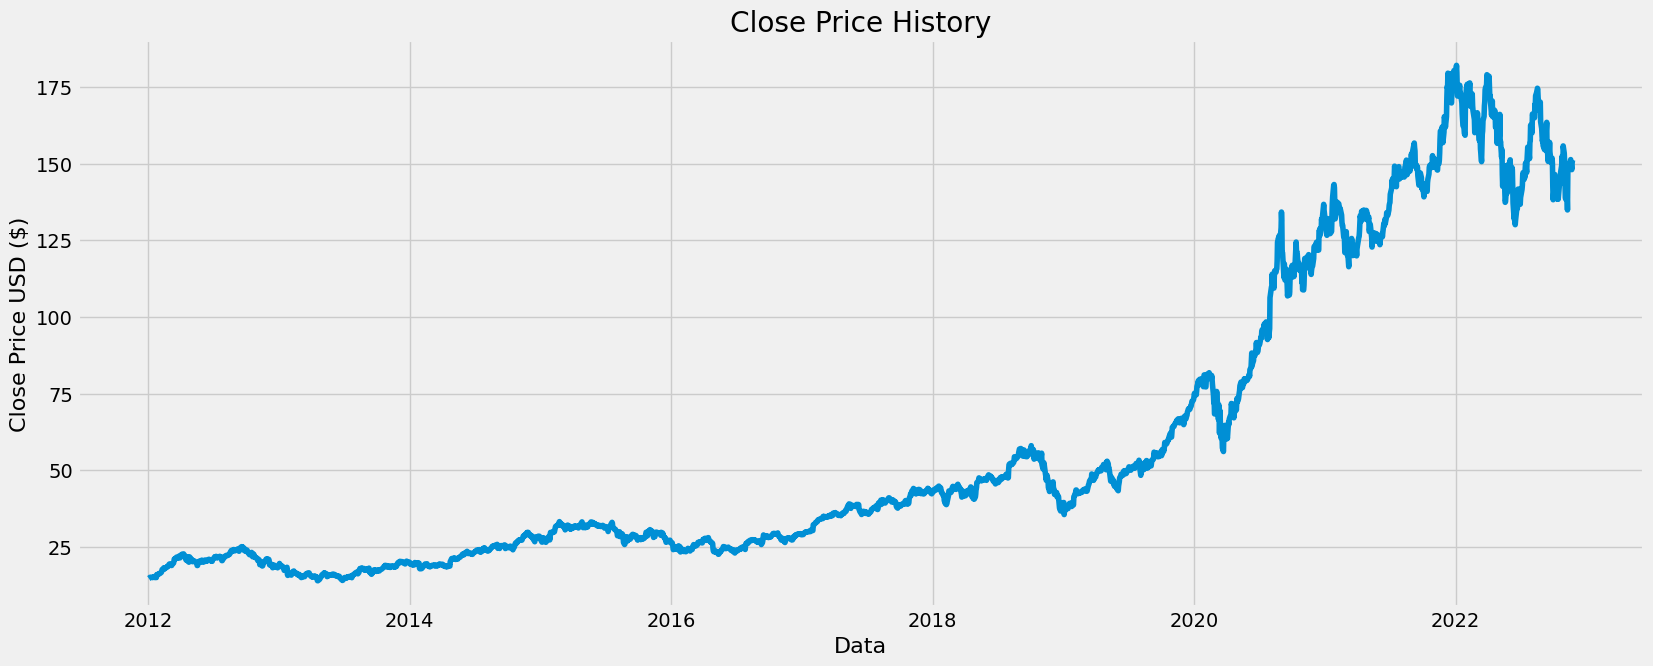

In [33]:
# Visualize the closing price history
plt.figure(figsize=(18, 7))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Data', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show();

In [35]:
# Create a new dataframe with only the 'Close' column
close = data.filter(['Close'])

# Convert the datafram to a numpy array
data_close = close.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(data_close) * .8)

training_data_len # 80% of 2743

2195

In [39]:
# Scale (or normalize) the data for training neural network
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.7976943 ],
       [0.81060616],
       [0.81590189]])

In [ ]:
# Create the training dataset
# Create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train data samples
X_train = []
y_train = []

for i in range(60, len(train_data)):
    # append 60 past days to the X_train
     

In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))

# We can use the following statements to calculate RMSE:
1. rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
2. rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
3. rmse = np.sqrt(((predictions - y_test) ** 2).mean())

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***